In [72]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')  #importing the dataset
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()  #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.shape # this gives the size of the dataset

(214, 10)

In [9]:
df.dtypes  # this gives the type of the features present in the dataset.

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [11]:
df.isnull().sum() # checking for missing or null values ,  as there are no null or missing values imputation is not required

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [21]:
df.describe() # gives the summary statistics

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


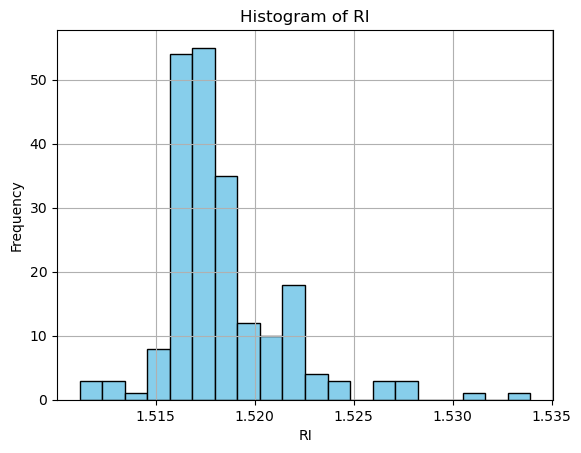

Skewness: 1.61
positively skewed


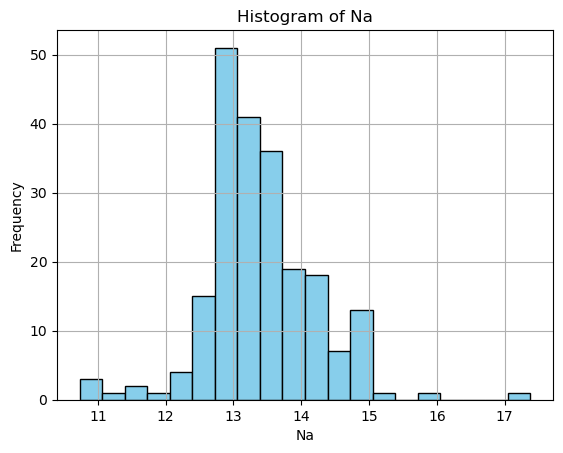

Skewness: 0.45
negatively skewed


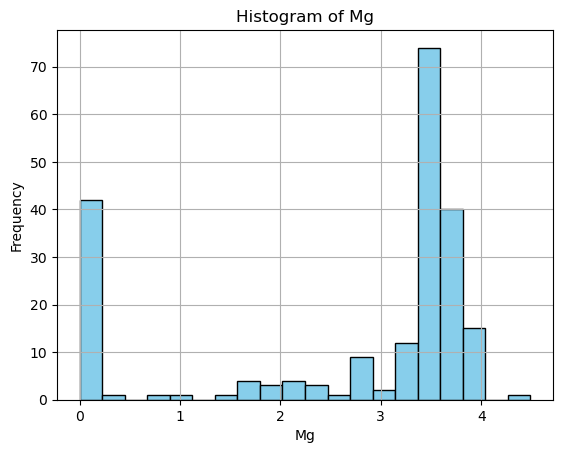

Skewness: -1.14
negatively skewed


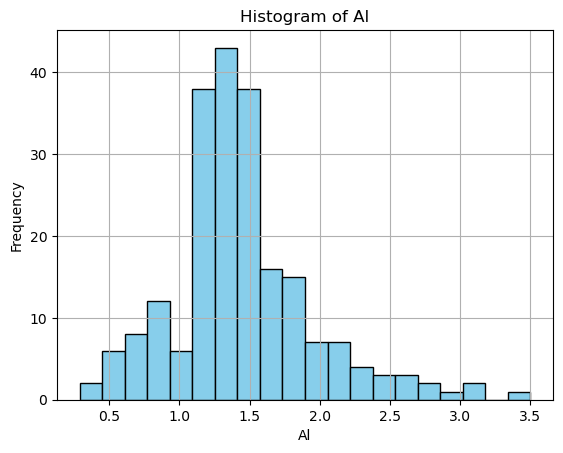

Skewness: 0.90
negatively skewed


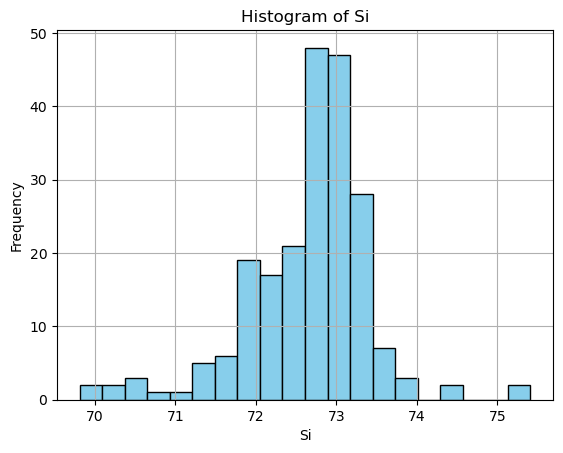

Skewness: -0.73
negatively skewed


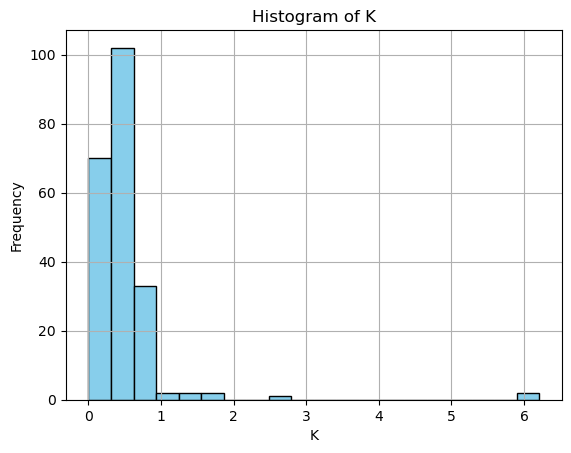

Skewness: 6.51
positively skewed


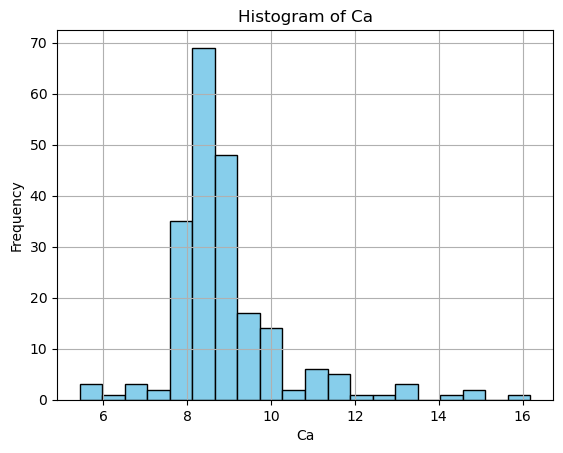

Skewness: 2.03
positively skewed


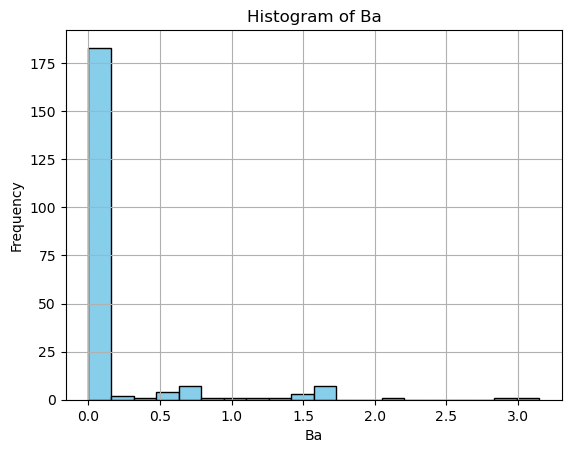

Skewness: 3.39
positively skewed


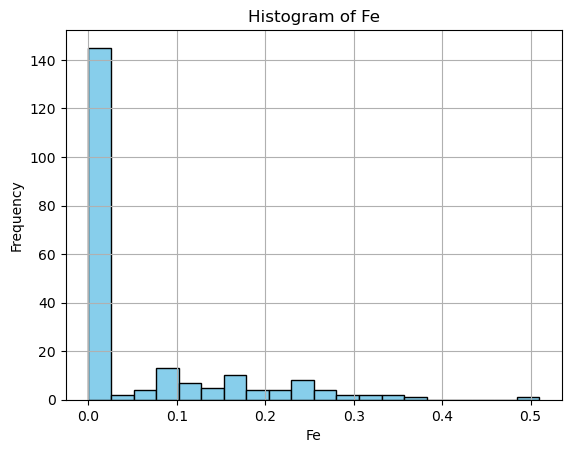

Skewness: 1.74
positively skewed


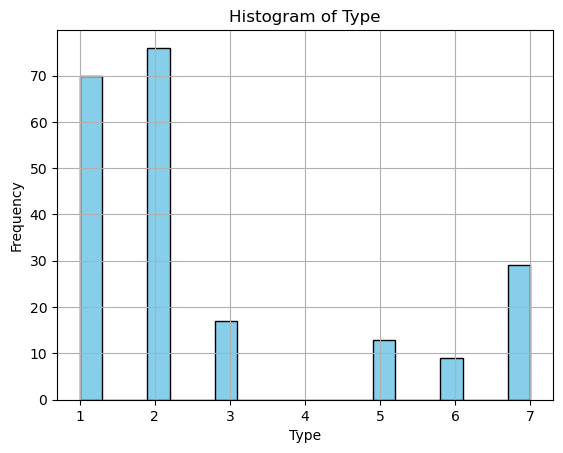

Skewness: 1.11
positively skewed


In [17]:
# data visualization
# visualizations histograms
num_col=df.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

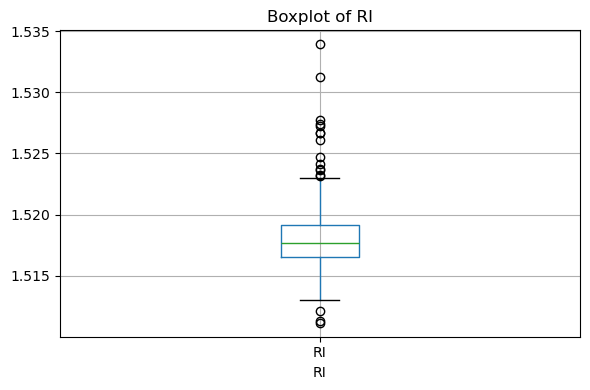

Outliers detected: 17
Lower extreme: 1.5125700000000002
Upper extreme: 1.52311


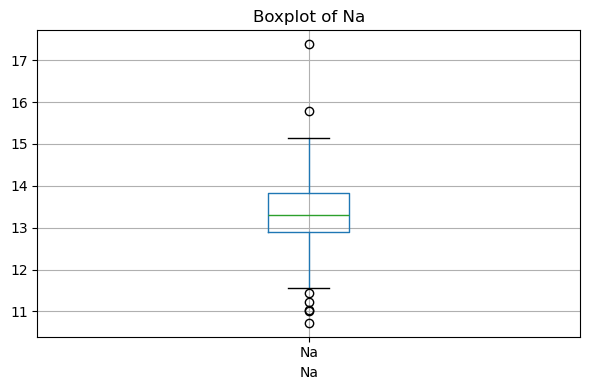

Outliers detected: 7
Lower extreme: 11.531250000000004
Upper extreme: 15.201249999999998


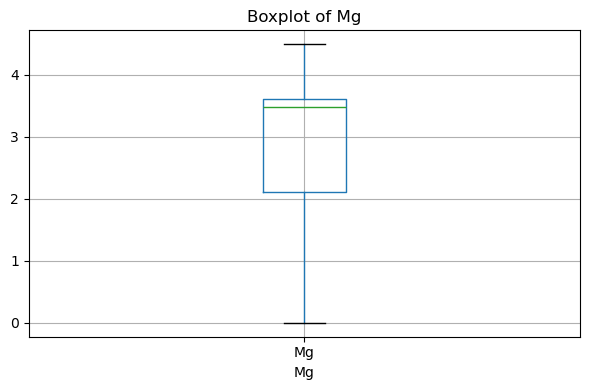

Outliers detected: 0
Lower extreme: -0.11250000000000071
Upper extreme: 5.827500000000001


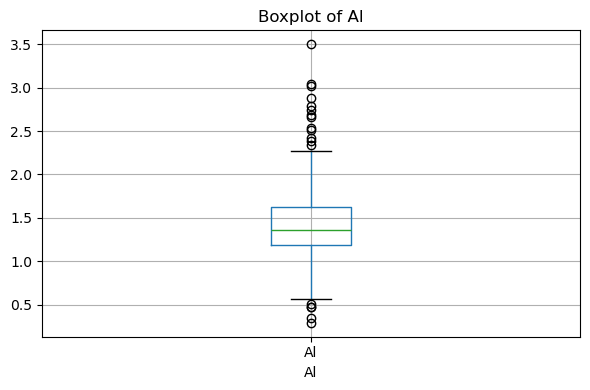

Outliers detected: 18
Lower extreme: 0.53
Upper extreme: 2.29


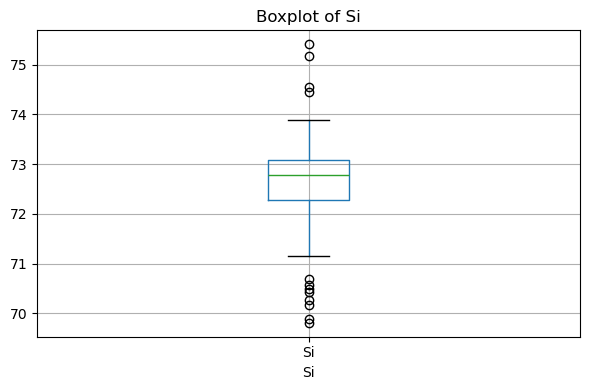

Outliers detected: 12
Lower extreme: 71.06875
Upper extreme: 74.29875000000001


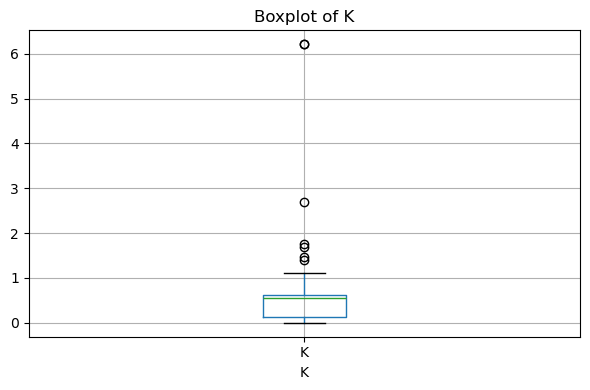

Outliers detected: 7
Lower extreme: -0.6087499999999999
Upper extreme: 1.34125


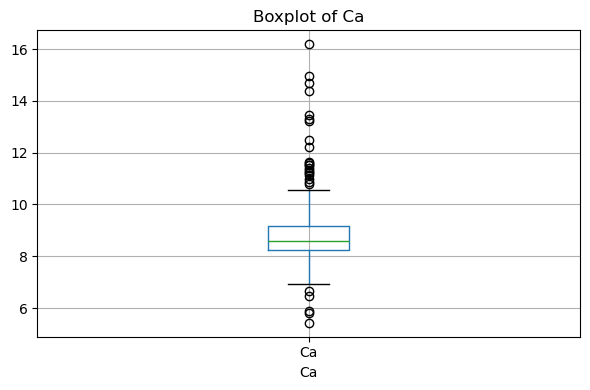

Outliers detected: 26
Lower extreme: 6.841250000000001
Upper extreme: 10.57125


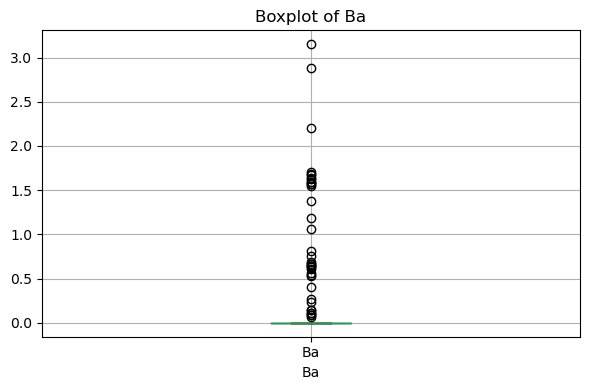

Outliers detected: 38
Lower extreme: 0.0
Upper extreme: 0.0


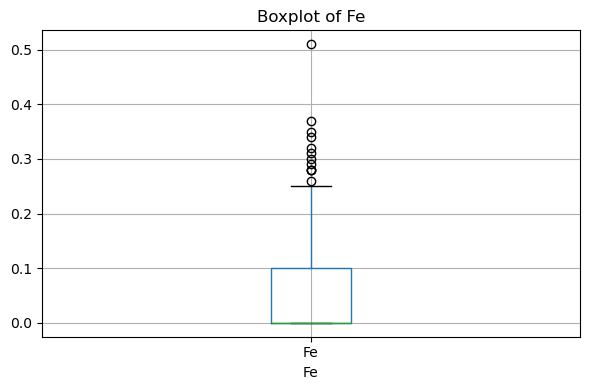

Outliers detected: 12
Lower extreme: -0.15000000000000002
Upper extreme: 0.25


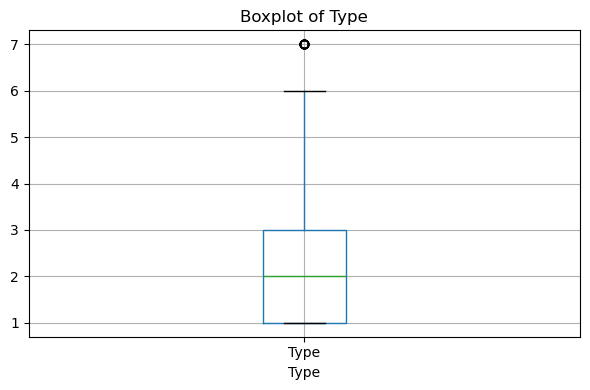

Outliers detected: 29
Lower extreme: -2.0
Upper extreme: 6.0


In [19]:
# boxplots
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [25]:
df.corr() # gives the correlation matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


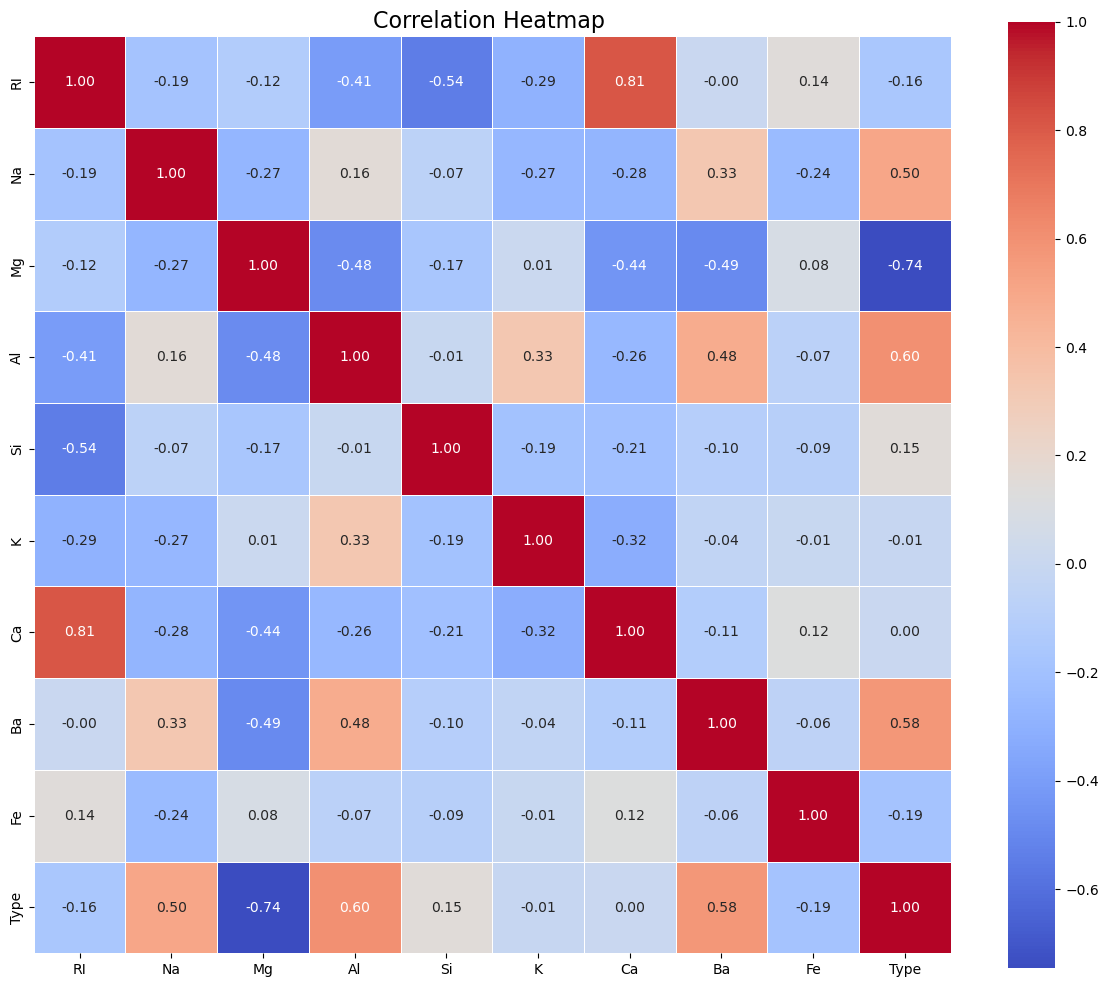

In [27]:
 #generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
# 3. data preprocessing
# handling outliers
# IQR method to cap outliers 
for col in num_col:
    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    df.loc[df.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    df.loc[df.loc[:,col] < lower_bound, col] = lower_bound
    
     

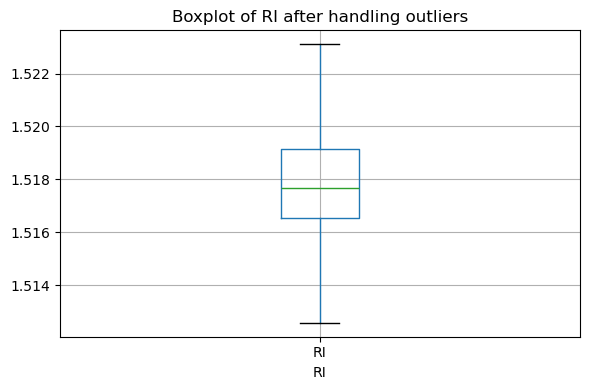

Outliers detected: 0
Lower extreme: 1.5125700000000002
Upper extreme: 1.52311


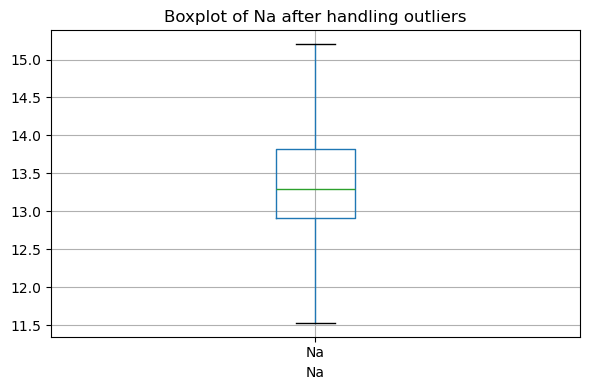

Outliers detected: 0
Lower extreme: 11.531250000000004
Upper extreme: 15.201249999999998


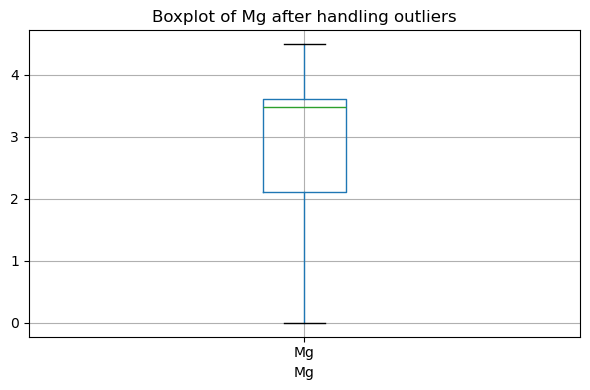

Outliers detected: 0
Lower extreme: -0.11250000000000071
Upper extreme: 5.827500000000001


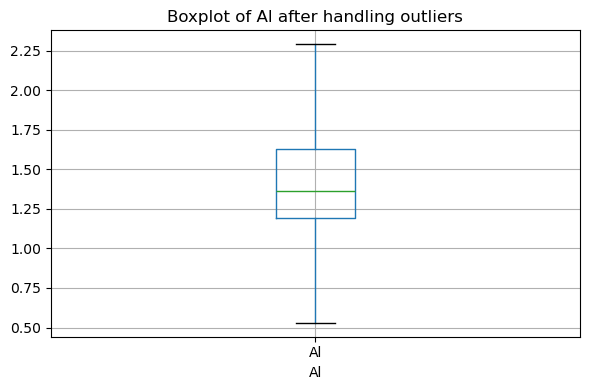

Outliers detected: 0
Lower extreme: 0.53
Upper extreme: 2.29


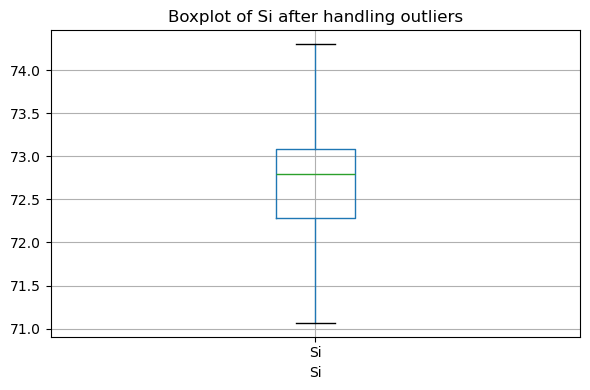

Outliers detected: 0
Lower extreme: 71.06875
Upper extreme: 74.29875000000001


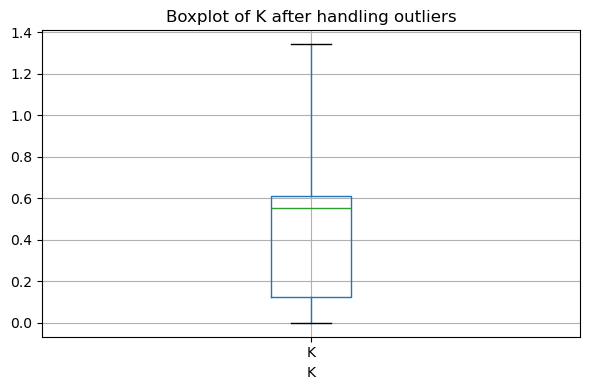

Outliers detected: 0
Lower extreme: -0.6087499999999999
Upper extreme: 1.34125


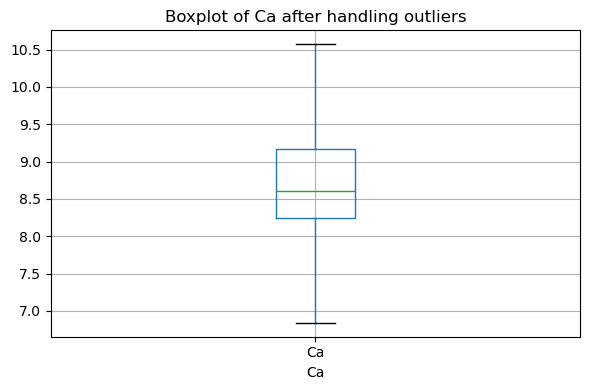

Outliers detected: 0
Lower extreme: 6.841250000000001
Upper extreme: 10.57125


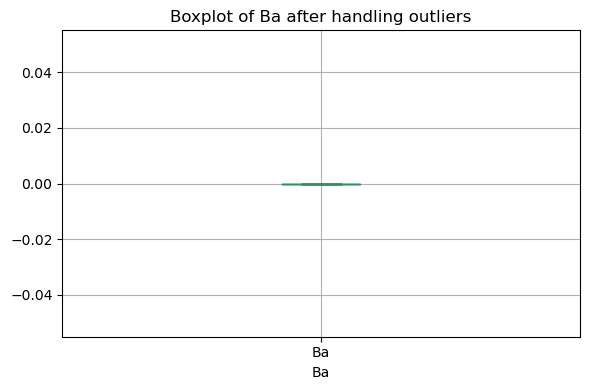

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


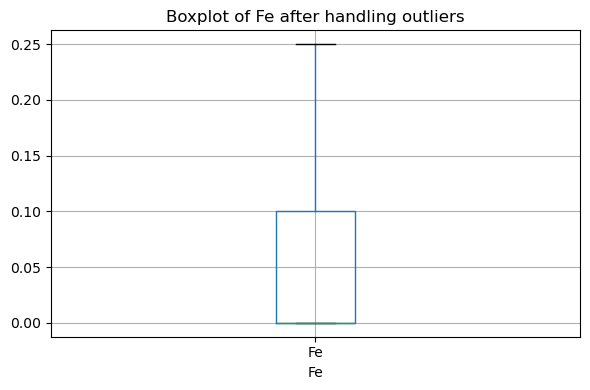

Outliers detected: 0
Lower extreme: -0.15000000000000002
Upper extreme: 0.25


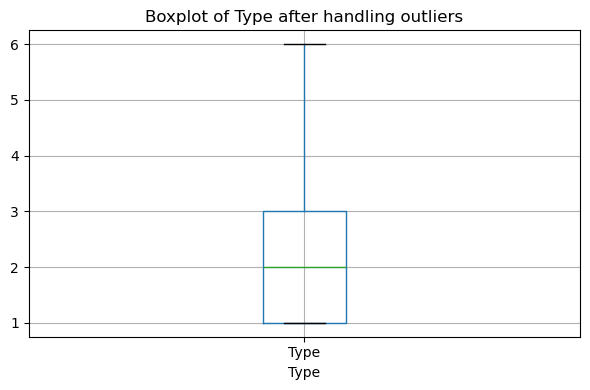

Outliers detected: 0
Lower extreme: -2.0
Upper extreme: 6.0


In [31]:
# boxplots after handling outliers
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [35]:
# applying standardization
x = df.drop('Type', axis=1) # dividing dependent and independent variables
y = df['Type']

# Standardization
scaler_standard = StandardScaler()
x_standardized = scaler_standard.fit_transform(x)
df_standardized = pd.DataFrame(x_standardized, columns=x.columns)

In [37]:
df_standardized.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091


In [39]:
# 4: Random Forest Model Implementation
# Dividing the data into train and test split.
x_train,x_test,y_train,y_test=train_test_split(x_standardized,y,test_size=0.3,random_state=100) 

In [66]:
# finding best hyperparameter values 
model= RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}

grid = GridSearchCV(estimator= model, param_grid=params, cv = 4, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 25}

In [64]:
# deploying the model with the best params provided by gridsearch
fmodel= RandomForestClassifier(n_estimators=25,max_depth=5,min_samples_leaf=5,random_state=42)
fmodel.fit(x_train,y_train)
fpred=fmodel.predict(x_test)
print(classification_report(y_test,fpred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        17
           2       0.60      0.72      0.65        25
           3       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         9
           6       1.00      0.82      0.90        11

    accuracy                           0.69        65
   macro avg       0.56      0.57      0.56        65
weighted avg       0.61      0.69      0.64        65



In [70]:
# 5: Bagging and Boosting Methods
# bagging
#applying Bagging method using decision tree classifier
dt=DecisionTreeClassifier()
model2=BaggingClassifier(dt,n_estimators=40)
model2.fit(x_train,y_train)
# evaluating on the test data
mpred=model2.predict(x_test)
print(classification_report(y_test,mpred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        17
           2       0.72      0.72      0.72        25
           3       0.50      0.33      0.40         3
           5       1.00      0.22      0.36         9
           6       0.75      0.82      0.78        11

    accuracy                           0.72        65
   macro avg       0.74      0.62      0.62        65
weighted avg       0.75      0.72      0.70        65



In [74]:
# boosting
clf=DecisionTreeClassifier()
#Applying Adaboost Classifier
model3=AdaBoostClassifier(clf,n_estimators=40)
model3.fit(x_train,y_train)
# evaluating the model on test data
ypred=model3.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.74      0.82      0.78        17
           2       0.86      0.72      0.78        25
           3       0.25      0.33      0.29         3
           5       0.86      0.67      0.75         9
           6       0.64      0.82      0.72        11

    accuracy                           0.74        65
   macro avg       0.67      0.67      0.66        65
weighted avg       0.76      0.74      0.74        65



In [ ]:
 # comparing the results
# Boosting (AdaBoost) gives better overall performance—higher accuracy and weighted average F1.

In [ ]:
# Additional Notes:
# 1. Explain Bagging and Boosting methods. How is it different from each other.
# bagging: Bagging is an ensemble learning method that builds multiple independent models (typically of the same type, like decision trees) using random subsets of the training data, and then averages or votes their predictions to improve accuracy and reduce variance.
# boosting : Boosting is an ensemble learning method that builds models sequentially, where each new model tries to correct the errors made by the previous ones. It focuses more on difficult cases.
# difference between both is in bagging independent model is trained parallely on different subsets, whereas i boosting model is trained sequentially one after the other.

#2. Explain how to handle imbalance in the data.
# we can handle imbalance data by performing resapling techniques,by the Use of Class Weights: Many classifiers support a class_weight parameter to give higher penalty to misclassifying minority classes. 